In [1]:
# normalization is technique used before machine learning in order scale veature into normal scaling
# minmax scaling 
# mean normalization
# max absolute scaling
# robust scaling

In [ ]:
# minmax scaling = actual vale - min value \ max - min value.,range = 0,1
# mean normalization = 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [3]:
df = pd.read_csv("winequality.csv")
ds =df[["fixed acidity","alcohol", "quality"]]
ds.head(2)

,fixed acidity,alcohol,quality
0,7.0,8.8,6
1,6.3,9.5,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


<AxesSubplot: xlabel='fixed acidity', ylabel='Density'>

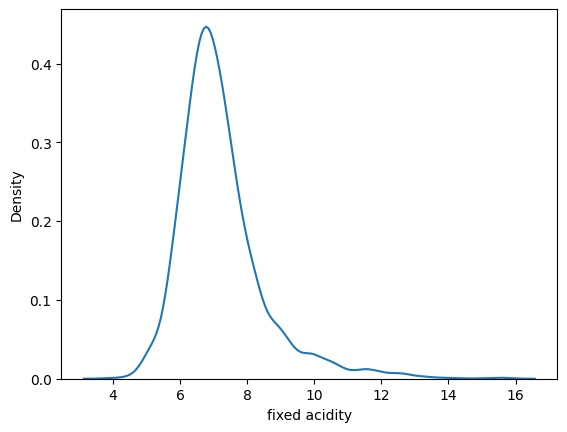

In [15]:
sns.kdeplot(ds['fixed acidity'])

In [5]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

<AxesSubplot: xlabel='fixed acidity', ylabel='alcohol'>

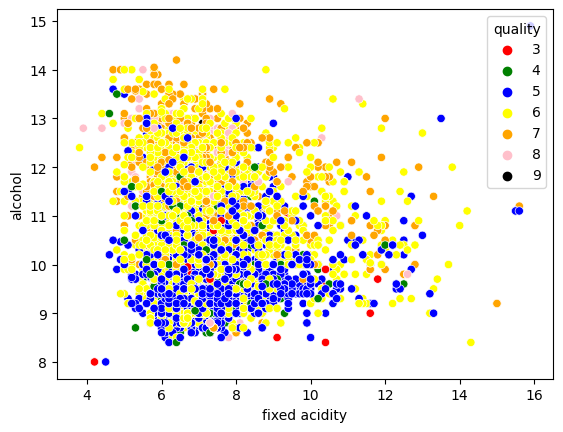

In [6]:
color_dict={3:'red', 4:'green', 5:'blue', 6:'yellow', 7:'orange', 8:'pink', 9:'black'}

sns.scatterplot(data=df,x="fixed acidity", y="alcohol", hue ="quality", palette=color_dict)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
df = df.drop(["type"], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6487 non-null   float64
 1   volatile acidity      6489 non-null   float64
 2   citric acid           6494 non-null   float64
 3   residual sugar        6495 non-null   float64
 4   chlorides             6495 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6488 non-null   float64
 9   sulphates             6493 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [72]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['quality'], axis=1),
                                                    df["quality"], test_size=0.3,
                                                    random_state =0)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scalar = MinMaxScaler()
scalar.fit(X_train)

#transformed
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [14]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [19]:
np.round(X_train.describe(),1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4538.0,4544.0,4545.0,4546.0,4546.0,4547.0,4547.0,4547.0,4539.0,4546.0,4547.0
mean,7.2,0.3,0.3,5.4,0.1,30.4,115.5,1.0,3.2,0.5,10.5
std,1.3,0.2,0.1,4.7,0.0,17.9,57.0,0.0,0.2,0.2,1.2
min,3.8,0.1,0.0,0.6,0.0,1.0,6.0,1.0,2.7,0.2,8.0
25%,6.4,0.2,0.2,1.8,0.0,17.0,77.0,1.0,3.1,0.4,9.5
50%,7.0,0.3,0.3,2.9,0.0,29.0,118.0,1.0,3.2,0.5,10.3
75%,7.7,0.4,0.4,8.0,0.1,41.0,156.0,1.0,3.3,0.6,11.3
max,15.6,1.6,1.0,65.8,0.6,289.0,440.0,1.0,4.0,2.0,14.2


In [20]:
np.round(X_train_scaled.describe(),1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4538.0,4544.0,4545.0,4546.0,4546.0,4547.0,4547.0,4547.0,4539.0,4546.0,4547.0
mean,0.3,0.2,0.3,0.1,0.1,0.1,0.3,0.1,0.4,0.2,0.4
std,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.2,0.1,0.2,0.0,0.0,0.1,0.2,0.1,0.3,0.1,0.2
50%,0.3,0.1,0.3,0.0,0.1,0.1,0.3,0.1,0.4,0.2,0.4
75%,0.3,0.2,0.4,0.1,0.1,0.1,0.3,0.2,0.5,0.2,0.5
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [26]:
import matplotlib.pyplot as plt

In [28]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

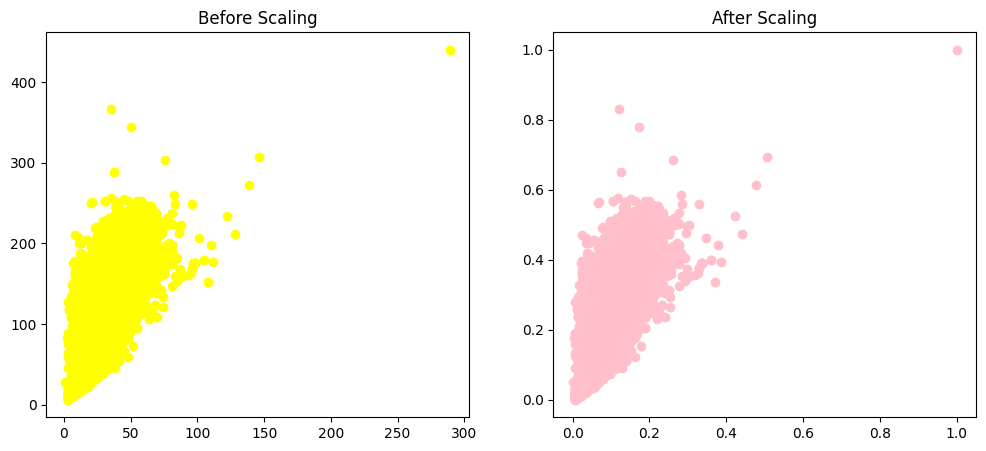

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train["free sulfur dioxide"], X_train["total sulfur dioxide"], color='yellow')
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled["free sulfur dioxide"], X_train_scaled["total sulfur dioxide"], color='pink')
ax2.set_title("After Scaling")
plt.show()

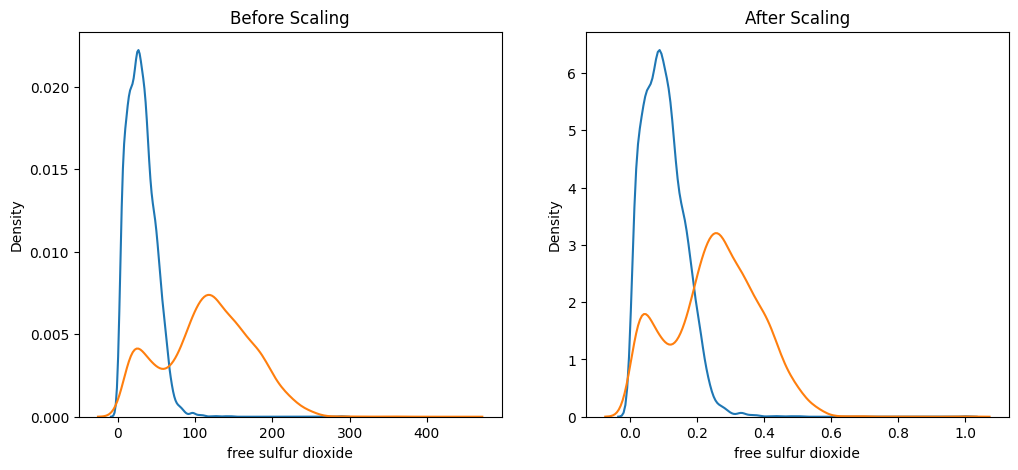

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

sns.kdeplot(X_train["free sulfur dioxide"], ax=ax1)
sns.kdeplot(X_train["total sulfur dioxide"], ax=ax1)
ax1.set_title("Before Scaling")

sns.kdeplot(X_train_scaled["free sulfur dioxide"],ax=ax2)
sns.kdeplot(X_train_scaled["total sulfur dioxide"], ax=ax2)
ax2.set_title("After Scaling")
plt.show()

In [46]:
##### Mean Normalization X_new = X_act - X_mean\X_max -X_min
### sklearn has no module of it

In [47]:
### Mean absolute Scaling, 
# sklearn module Mamabsscaling used in parse data having max no of zeros in features

In [48]:
## Robust scaling i.e. x_new = x_act -x_median \ IQR(75%-25%)
# sklearn Robustscaling its used if data having maximum no of outlier

In [49]:
##### Normalization vs Standarization
#### Is feature Scaliung required in decusion tree not rquired
## Most of problem is soved in standarization
#then min max scaling use image processing